## Serializing the data

In [57]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [58]:
x = np.linspace(-5,5,50)
real_y = x*[3.4]+1
y = real_y + np.random.normal(0,2,(50,))

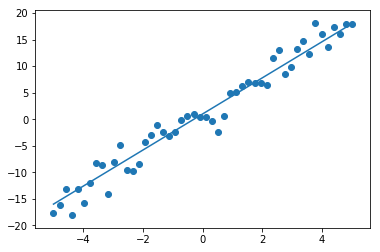

In [59]:
plt.plot(x, real_y)
plt.scatter(x,y)
plt.show()

In [60]:
W = tf.Variable(.0)
b = tf.Variable(.0)

In [65]:
def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    tf.summary.histogram('histogram', var)

with tf.name_scope('weights_001'):
    variable_summaries(W)
    
with tf.name_scope('biaes_001'):
    variable_summaries(b)
    
predictions = x*W + b
delta = tf.square(predictions - y)
loss = tf.reduce_mean(delta)
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)
  
with tf.name_scope('loss'):
    variable_summaries(loss)
    
# with tf.name_scope('optimize'):
#     variable_summaries(optimizer)

merged = tf.summary.merge_all()

init = tf.global_variables_initializer()

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./logs/board001/', sess.graph)
    sess.run(init)
    for i in range(2):
        summary,_ = sess.run([merged,train])
        writer.add_summary(summary,i)
    writer.close()